In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:
data = pd.read_csv('/home/code_wizard/coding_files/machine_learning_1/Assignment_dataset.csv')
data=pd.DataFrame(data)
data.columns
data.head()

,Categorical_1,Categorical_2,Feature_1,Feature_2,Feature_3,Label
0,2,1,2824.802093,2530.517100,2717.842544,4
1,1,1,908.538051,1371.403348,1480.603380,2
2,1,0,4264.296027,4085.271732,4433.111426,4
3,2,1,650.809883,1537.163058,1002.764724,0
4,2,1,743.972385,1580.194147,992.426731,0


In [21]:
categorical_features=[]
continuous_features=[]
for feature in data.columns:
    if data[feature].dtype=='int32' or data[feature].dtype=='int4':
        categorical_features.append(feature)
    else:
        continuous_features.append(feature)

print(continuous_features)
print(categorical_features)  

for feature in data.columns:
    if feature in continuous_features:
        data[feature]=(data[feature]-data[feature].min())/(data[feature].max()-data[feature].min())
        
data

['Categorical_1', 'Categorical_2', 'Feature_1', 'Feature_2', 'Feature_3', 'Label']
[]


,Categorical_1,Categorical_2,Feature_1,Feature_2,Feature_3,Label
0,1.0,1.0,0.635922,0.598592,0.569223,1.00
1,0.5,1.0,0.193404,0.318476,0.282663,0.50
2,0.5,0.0,0.968341,0.974320,0.966501,1.00
3,1.0,1.0,0.133888,0.358534,0.171990,0.00
4,1.0,1.0,0.155401,0.368933,0.169595,0.00
...,...,...,...,...,...,...
4995,0.5,0.0,0.402636,0.298745,0.384628,0.25
4996,0.0,1.0,0.630694,0.583502,0.562399,1.00
4997,0.5,1.0,0.074309,0.156388,0.148846,0.75
4998,0.5,1.0,0.568773,0.487514,0.556259,0.25


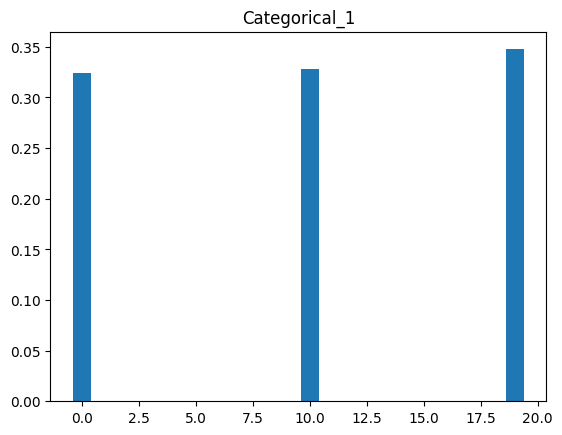

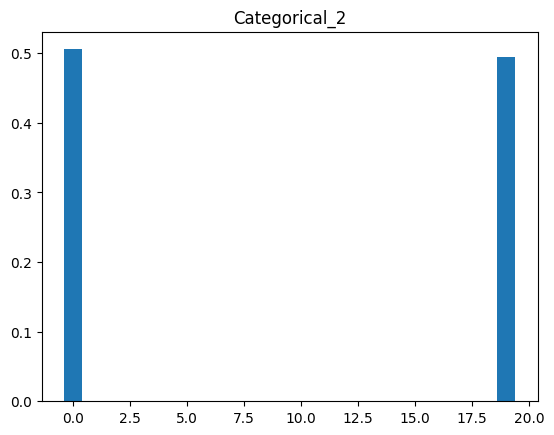

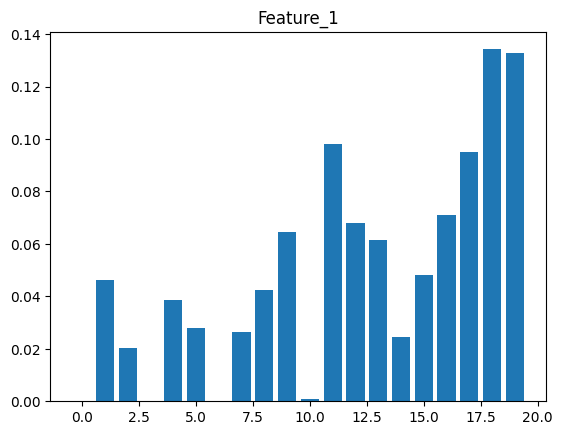

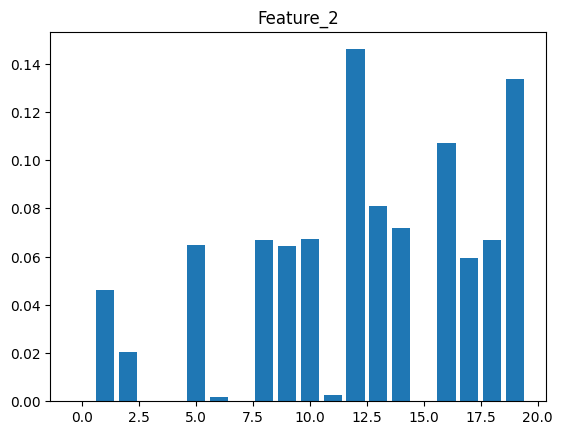

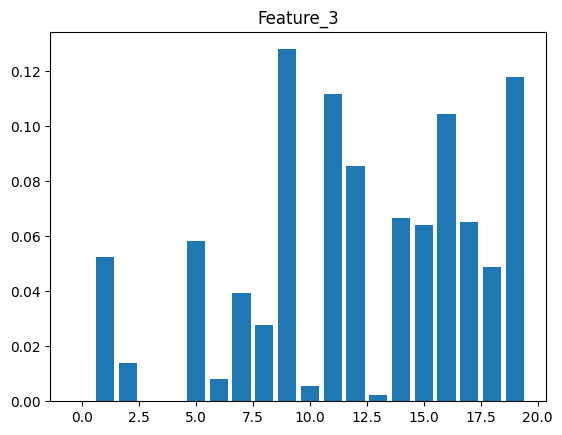

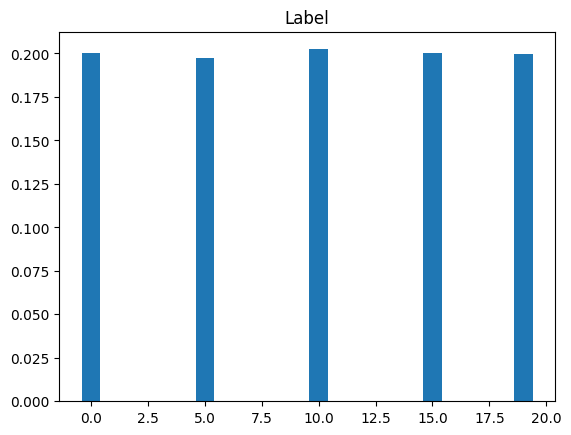

In [22]:
def bins_counts(feature):
    bins=np.linspace(data[feature].max(),data[feature].min(),20)
    bins,counts = np.unique(np.digitize(data[feature],bins),return_counts=True)
    return bins,counts/sum(counts)

for feature in continuous_features:
    bins,counts=bins_counts(feature)
    plt.bar(bins,counts)
    plt.title(feature)
    plt.show()


In [23]:
def K(x):
    const = 1/np.sqrt(2*np.pi)
    term = const*np.exp(-((x**2)/2))
    return const*term


In [24]:
def get_gaussian_likelihood(x,mu,sigma):
    const = 1/(np.sqrt(2*np.pi)*sigma)
    term = np.exp((-1/2)*((x-mu)/sigma)**2)
    return const*term


In [25]:
def KDE_likelihood(x,feature,bandwidth = 0.04):
    s=0
    for i in range(len(data)):
        s=s+get_gaussian_likelihood(x,data[feature][i],bandwidth)
    likelihood=s/len(data)
    return likelihood

grid = np.linspace(data[feature].max(),data[feature].min(),600)







In [26]:
def visualise_kde_vs_gaussian(feature):
    
    grid = np.linspace(data[feature].max(),data[feature].min(),600)
    kde_likelihood_feature=[]
    for i in range(len(grid)):

        kde_likelihood=KDE_likelihood(grid[i],feature)
        kde_likelihood_feature.append(kde_likelihood)

    gaussian_likelihood_feature=[]
    for i in range(len(grid)):

        gaussian_likelihood = get_gaussian_likelihood(grid[i],data[feature].mean(),data[feature].std())
        gaussian_likelihood_feature.append(gaussian_likelihood)
    return kde_likelihood_feature,gaussian_likelihood_feature



In [27]:
'''for feature in data.columns:
    kde_likelihood,gaussian_likelihood = visualise_kde_vs_gaussian(feature)
    
    plt.plot(gaussian_likelihood)
    plt.plot(kde_likelihood)
    plt.legend()
    plt.title(feature)
    plt.show()'''

'for feature in data.columns:\n    kde_likelihood,gaussian_likelihood = visualise_kde_vs_gaussian(feature)\n    \n    plt.plot(gaussian_likelihood)\n    plt.plot(kde_likelihood)\n    plt.legend()\n    plt.title(feature)\n    plt.show()'

In [28]:
feature1 = data.columns[0]
feature1

'Categorical_1'

In [29]:
'''def get_kde_class_wise(x,feature,class_label,bandwidth=0.04):
    s=0
    data_new=data[feature][data['Label']==class_label]
    for i in range(len(data_new)):
        s=s+get_gaussian_likelihood(x,list(data_new)[i],bandwidth)
        likelihood=s/len(data_new)
    return likelihood

for feature in continuous_features:

    grid = np.linspace(data[feature].max(),data[feature].min(),600)

    kde_class_0=[]
    for i in range(len(grid)):
        kde=get_kde_class_wise(grid[i],feature,0)
        kde_class_0.append(kde)

    kde_class_1=[]
    for i in range(len(grid)):
        kde=get_kde_class_wise(grid[i],feature,1)
        kde_class_1.append(kde)


    kde_class_025=[]
    for i in range(len(grid)):
        kde=get_kde_class_wise(grid[i],feature,0.25)
        kde_class_025.append(kde)


    kde_class_075=[]
    for i in range(len(grid)):
        kde=get_kde_class_wise(grid[i],feature,0.75)
        kde_class_075.append(kde)

    kde_class_05=[]
    for i in range(len(grid)):
        kde=get_kde_class_wise(grid[i],feature,0.5)
        kde_class_05.append(kde)

    plt.plot(grid,kde_class_0, label='class 0 KDE likelihoods')
    plt.plot(grid,kde_class_05, label='class 0.5 KDE likelihoods')
    plt.plot(grid,kde_class_025, label='class 0.25 KDE likelihoods')
    plt.plot(grid,kde_class_075, label='class 0.75 KDE likelihoods')
    plt.plot(grid,kde_class_1, label='class 1 KDE likelihoods')
    plt.xlabel('feature values')
    plt.ylabel('estimated likelihood')
    plt.title(feature)
    plt.legend()
    plt.show()'''









        




        




"def get_kde_class_wise(x,feature,class_label,bandwidth=0.04):\n    s=0\n    data_new=data[feature][data['Label']==class_label]\n    for i in range(len(data_new)):\n        s=s+get_gaussian_likelihood(x,list(data_new)[i],bandwidth)\n        likelihood=s/len(data_new)\n    return likelihood\n\nfor feature in continuous_features:\n\n    grid = np.linspace(data[feature].max(),data[feature].min(),600)\n\n    kde_class_0=[]\n    for i in range(len(grid)):\n        kde=get_kde_class_wise(grid[i],feature,0)\n        kde_class_0.append(kde)\n\n    kde_class_1=[]\n    for i in range(len(grid)):\n        kde=get_kde_class_wise(grid[i],feature,1)\n        kde_class_1.append(kde)\n\n\n    kde_class_025=[]\n    for i in range(len(grid)):\n        kde=get_kde_class_wise(grid[i],feature,0.25)\n        kde_class_025.append(kde)\n\n\n    kde_class_075=[]\n    for i in range(len(grid)):\n        kde=get_kde_class_wise(grid[i],feature,0.75)\n        kde_class_075.append(kde)\n\n    kde_class_05=[]\n    f

In [30]:
for feature in continuous_features:
    print(feature)

Categorical_1
Categorical_2
Feature_1
Feature_2
Feature_3
Label


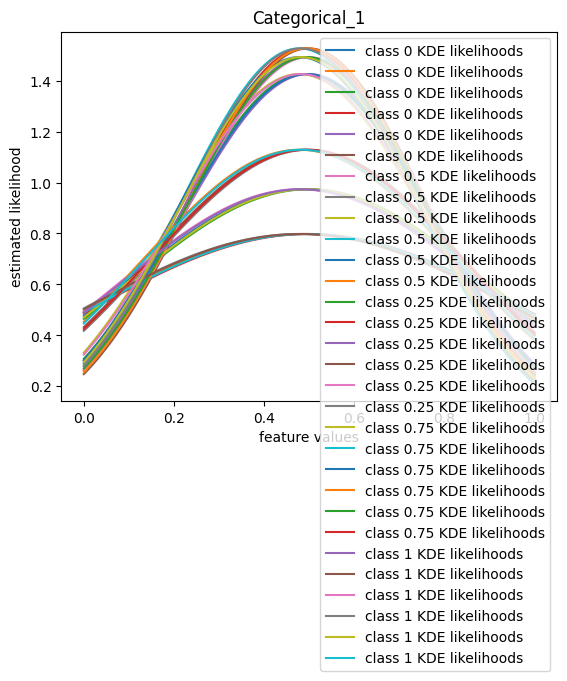

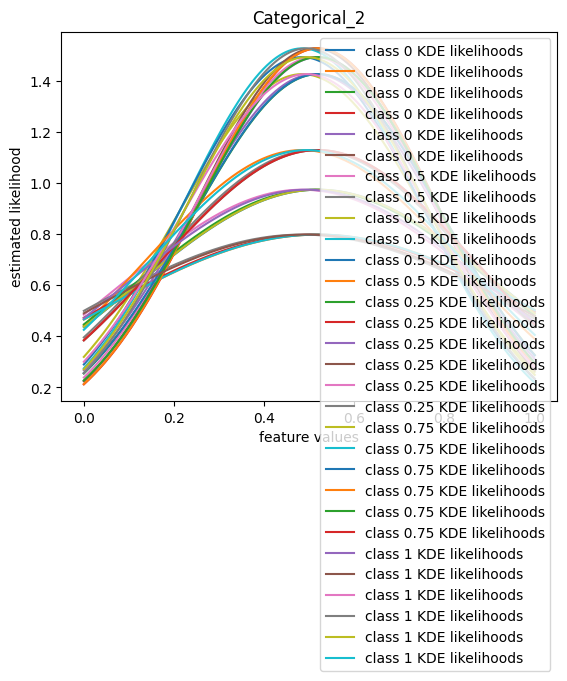

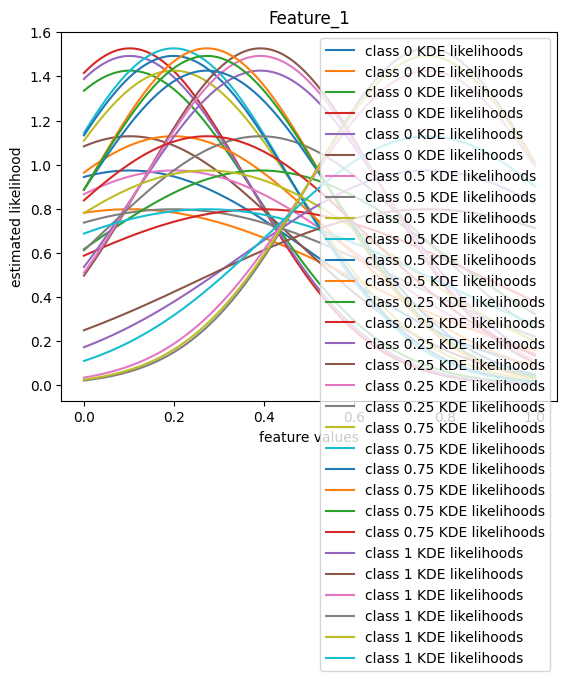

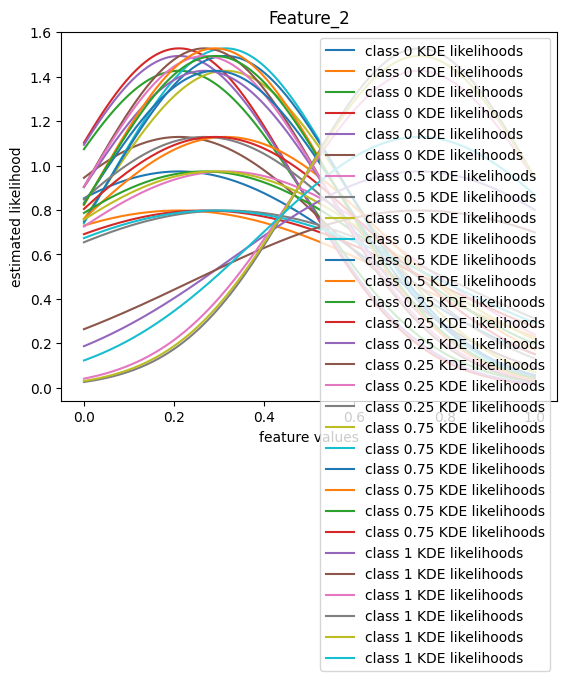

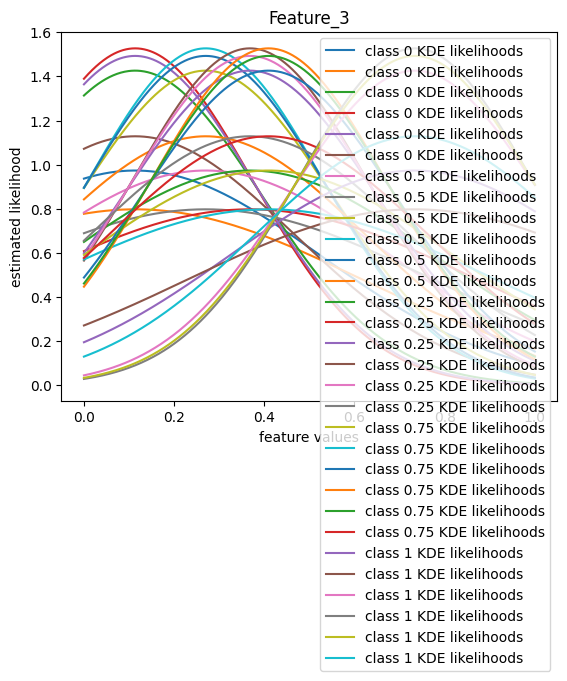

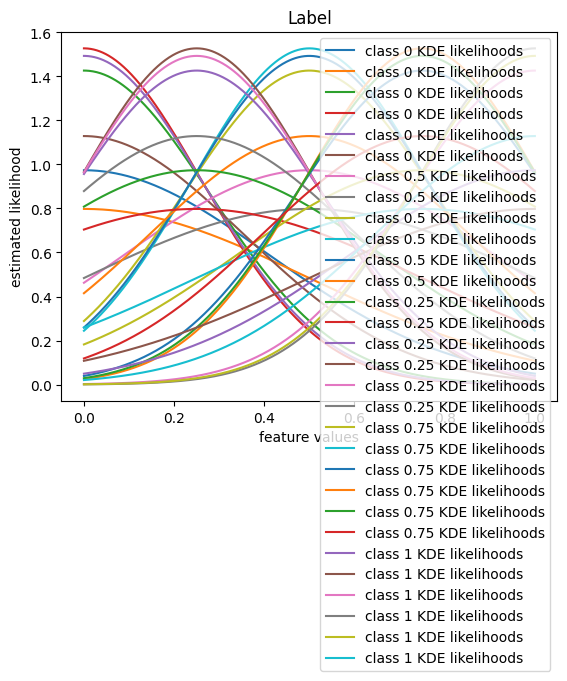

In [31]:
def get_gaussian_likelihood_class_wise(x,feature,class_label):
    
    data_new=data[feature][data['Label']==class_label]
    likelihood = get_gaussian_likelihood(x,data_new.mean(),data.std())
    return likelihood

for feature in continuous_features:

    grid = np.linspace(data[feature].max(),data[feature].min(),600)

    gaussian_class_0=[]
    for i in range(len(grid)):
        gaussian=get_gaussian_likelihood_class_wise(grid[i],feature,0)
        gaussian_class_0.append(gaussian)

    gaussian_class_1=[]
    for i in range(len(grid)):
        gaussian=get_gaussian_likelihood_class_wise(grid[i],feature,1)
        gaussian_class_1.append(gaussian)


    gaussian_class_025=[]
    for i in range(len(grid)):
        gaussian=get_gaussian_likelihood_class_wise(grid[i],feature,0.25)
        gaussian_class_025.append(gaussian)


    gaussian_class_075=[]
    for i in range(len(grid)):
        gaussian=get_gaussian_likelihood_class_wise(grid[i],feature,0.75)
        gaussian_class_075.append(gaussian)

    gaussian_class_05=[]
    for i in range(len(grid)):
        gaussian=get_gaussian_likelihood_class_wise(grid[i],feature,0.5)
        gaussian_class_05.append(gaussian)

    plt.plot(grid,gaussian_class_0, label='class 0 KDE likelihoods')
    plt.plot(grid,gaussian_class_05, label='class 0.5 KDE likelihoods')
    plt.plot(grid,gaussian_class_025, label='class 0.25 KDE likelihoods')
    plt.plot(grid,gaussian_class_075, label='class 0.75 KDE likelihoods')
    plt.plot(grid,gaussian_class_1, label='class 1 KDE likelihoods')
    plt.xlabel('feature values')
    plt.ylabel('estimated likelihood')
    plt.title(feature)
    plt.legend()
    plt.show()


